In [13]:
import pandas as pd
train = pd.read_csv("train.csv",sep=",")
test = pd.read_csv("test_job.csv",sep=",")
job_tag = pd.read_csv("job_tags.csv",sep=",")
user_tag = pd.read_csv("user_tags.csv",sep=",")
job_company = pd.read_csv("job_companies.csv",sep=",")
tags = pd.read_csv("tags.csv",sep=",")
print(user_tag.duplicated().sum())
user_tag = user_tag.drop_duplicates()

14612


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 3 columns):
userID     6000 non-null object
jobID      6000 non-null object
applied    6000 non-null int64
dtypes: int64(1), object(2)
memory usage: 140.8+ KB


In [3]:
set = pd.concat([train.iloc[:,[0,1]],test],axis=0)
set.describe()

,userID,jobID
count,8435,8435
unique,196,733
top,b052e2e0c0ad1b2d5036bd56e27d061c,da0d1111d2dc5d489242e60ebcbaf988
freq,155,74


In [7]:
# merge1 = pd.merge(set,user_tag,how="left")
# merge2 = pd.merge(merge1, job_tag, on="jobID", how="left" )
# merge3 = pd.merge(merge2, tags, left_on="tagID_x", right_on="tagID",how="left")
# merge4 = pd.merge(merge3, tags, left_on="tagID_y", right_on="tagID",how="left")
# merge4.describe()
job_tag.shape

(3477, 2)

In [6]:
import numpy as np

m1 = pd.merge(user_tag, tags, how = "left")
m2 = pd.merge(job_tag, tags, how="left")
# m11.sort_values(by="userID")
merge1 = pd.merge(train,m1,how="left")
merge1.describe()
m2.shape

(3477, 3)

In [16]:
train1 = train[train["applied"]==1]
train1.shape

(857, 3)

In [17]:
merge2 = pd.merge(train , m1, how="left")
merge3 = pd.merge(merge2, m2, on = "jobID")

In [21]:
merge3.duplicated().sum()
merge3.shape

(436258, 7)

In [27]:
merge4 = pd.merge(merge3, job_company, on = "jobID")
print(merge4.shape)
c3 = merge4.iloc[:,[0,2,4,6,8]].drop_duplicates()
c3["count"]

(436258, 9)


,userID,applied,keyword_x,keyword_y,companySize
0,fe292163d06253b716e9a0099b42031d,0,MongoDB,Ruby on Rails,11-50
1,fe292163d06253b716e9a0099b42031d,0,MongoDB,Ruby,11-50
2,fe292163d06253b716e9a0099b42031d,0,Docker,Ruby on Rails,11-50
3,fe292163d06253b716e9a0099b42031d,0,Docker,Ruby,11-50
4,fe292163d06253b716e9a0099b42031d,0,Java,Ruby on Rails,11-50


In [28]:
company = job_company["companySize"].fillna("unknown")
a,b = tags["keyword"].factorize()
tags.describe()

,tagID,keyword
count,887,887
unique,887,887
top,819c9fbfb075d62a16393b9fe4fcbaa5,Apollo Server
freq,1,1


In [29]:
mer = pd.merge(train,job_company,on="jobID")
mer1 = mer[mer["applied"]==1]
mer1["companySize"].value_counts()/mer["companySize"].value_counts()

1-10        0.106579
1000 이상     0.080460
101-200     0.182137
11-50       0.146844
201-500     0.145914
501-1000    0.111111
51-100      0.128151
Name: companySize, dtype: float64

In [106]:
c4 = merge4.iloc[:,[4,6,2]].drop_duplicates()
c4.rename(columns = {"applied" : "raw_ratings"},inplace = True)
gc4 = c4.groupby(["keyword_x","keyword_y"]).mean().unstack().fillna("")
gc4.isnull()

0

TypeError: Image data of dtype object cannot be converted to float

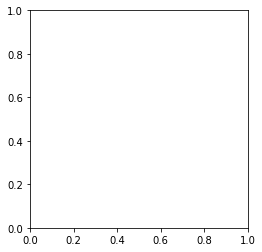

In [97]:
import matplotlib.pyplot as plt
%matplotlib inline


In [107]:
# import surprise
# from surprise.model_selection import cross_validate
# sim_options = {'name' : 'cosine'}
# algo = surprise.KNNBasic(sim_options=sim_options)
# cross_validate(algo,gc4)["test_mae"].mean()

KeyError: 92